<a href="https://colab.research.google.com/github/AHMEDHAMID123/Multiclass_classfier/blob/main/Butterfly_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Butterfly classification
- Classifying 75 species of butterflies

## getting the data from kaggle

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahmedabdelhamidyouns","key":"d1683255f0c01a0e3a75b91bd60fb432"}'}

In [4]:
! mkdir ~/.kaggle//

In [5]:
!cp kaggle.json /root/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
import kaggle

In [8]:
!kaggle datasets download -d gpiosenka/butterfly-images40-species

 96% 350M/365M [00:02<00:00, 104MB/s]
100% 365M/365M [00:02<00:00, 141MB/s]


### Unziping the data files

In [9]:
import zipfile

In [10]:
with zipfile.ZipFile("/content/butterfly-images40-species.zip", "r") as f:
  f.extractall()

## loading the data into data loaders and exploring them

In [ ]:
import pathlib
from fastai.vision.all import *

In [14]:
path_o = "/content

In [13]:
path = pathlib.Path(pathtrain)

In [12]:
path.ls()

In [11]:
butterflies = DataBlock(blocks = [ImageBlock , CategoryBlock],
               get_items= get_image_files,
               get_y= parent_label, item_tfms= Resize(460), 
               splitter=GrandparentSplitter(train_name='train', valid_name='valid'),
               batch_tfms= aug_transforms(mult= 2 , size= 244 , min_scale= 0.75))

In [97]:
dls = butterflies.dataloaders(path)

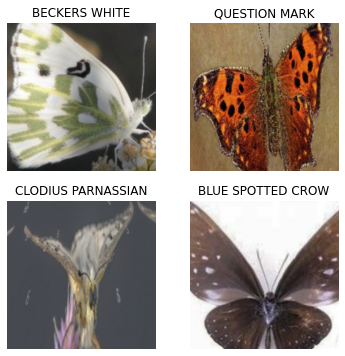

In [46]:
dls.show_batch(max_n= 4)

##  Training the model without learning rate finder

In [38]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(1, base_lr=0.1)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,3.561647,6.546815,0.461333,01:08


epoch,train_loss,valid_loss,accuracy,time
0,2.344478,0.663967,0.810667,01:12


### finding the learning rate and retrain the model

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


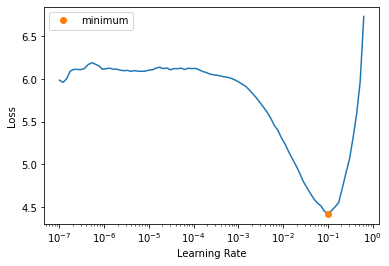

In [51]:
learn = vision_learner(dls , resnet34, metrics = error_rate)
lr_min = learn.lr_find(suggest_funcs=(minimum))

SuggestedLRs(valley=0.0012022644514217973)

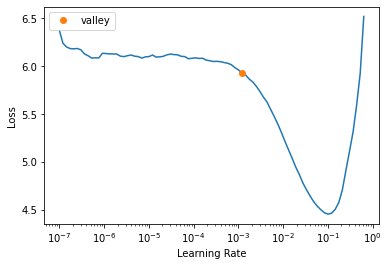

In [52]:
learn.lr_find()

In [57]:
lr = lr_min[0]/10

In [59]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(2, base_lr=lr)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,2.939475,0.908163,0.765333,01:08


epoch,train_loss,valid_loss,accuracy,time
0,0.934922,0.316242,0.904000,01:13
1,0.574805,0.232370,0.946667,01:14


- There is an big improvment in the model performance after using the learning rate finder, which shows the importance of tunning the learning rate hyperparameter

## Unfreezzing and transfer learning 

 * There are more steps we can explore to further improve the model performance, and make the most use of the transfer learning.

In [60]:
learn = vision_learner(dls , resnet34, metrics = accuracy)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [61]:
learn.fit_one_cycle(3, lr)

epoch,train_loss,valid_loss,accuracy,time
0,2.370961,0.599650,0.845333,01:10
1,0.897051,0.301154,0.909333,01:09
2,0.614863,0.274966,0.922667,01:09


In [62]:
learn.unfreeze()

SuggestedLRs(minimum=2.7542287170945203e-07)

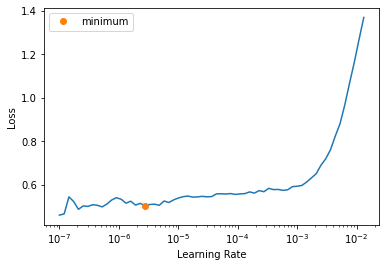

In [63]:
learn.lr_find(suggest_funcs= minimum)

- The learning rate graph shows that the model has already been trained and there is no more sharp decrease in the loss function after 3 epochs.

In [65]:
learn.fit_one_cycle(6, lr_max= 2e-07 )

epoch,train_loss,valid_loss,accuracy,time
0,0.577657,0.272675,0.922667,01:13
1,0.568519,0.273660,0.928000,01:14
2,0.580120,0.272654,0.928000,01:21
3,0.561531,0.265756,0.925333,01:18
4,0.561671,0.269753,0.925333,01:12
5,0.557187,0.267243,0.930667,01:13


- There is no further improvment in the model perfromance after using 9 epochs and unfreezing the earlier layers.

## Discriminative Learning rates

In [66]:
learn = vision_learner(dls , resnet34, metrics = accuracy)
learn.fit_one_cycle(3, lr)


/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,2.331456,0.573459,0.848000,01:09
1,0.892603,0.281790,0.933333,01:08
2,0.641367,0.247504,0.941333,01:08


SuggestedLRs(valley=2.0892961401841603e-05)

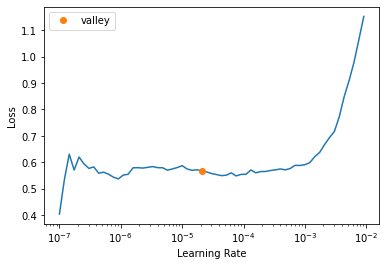

In [67]:
learn.unfreeze()
learn.lr_find()

SuggestedLRs(minimum=3.0199516913853586e-06)

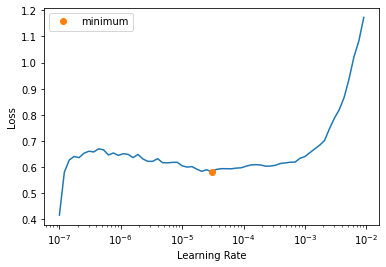

In [69]:
learn.lr_find(suggest_funcs= (minimum))

In [70]:
learn.fit_one_cycle(9, lr_max = slice(3.0e-07,2.0e-05 ))

epoch,train_loss,valid_loss,accuracy,time
0,0.573553,0.240093,0.938667,01:12
1,0.583130,0.237871,0.941333,01:11
2,0.573762,0.225802,0.941333,01:12
3,0.533774,0.224838,0.938667,01:12
4,0.521414,0.214600,0.936000,01:12
5,0.495173,0.210243,0.941333,01:11
6,0.475092,0.212198,0.936000,01:13
7,0.470682,0.208906,0.941333,01:12
8,0.482667,0.206765,0.941333,01:11


- There is still no improvment in the performance of the model. We can then consider deeper architecture with higher number of parameters to train.

## Using deeper architectures

In [71]:
learn = vision_learner(dls, resnet50, metrics = accuracy)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [72]:
learn.fine_tune(6, freeze_epochs= 3)

epoch,train_loss,valid_loss,accuracy,time
0,2.248554,0.675568,0.821333,01:35
1,0.990398,0.343471,0.906667,01:36
2,0.643931,0.285127,0.914667,01:36


epoch,train_loss,valid_loss,accuracy,time
0,0.390305,0.202369,0.938667,02:05
1,0.361098,0.230256,0.928000,02:06
2,0.275169,0.216787,0.941333,02:06
3,0.175962,0.155887,0.962667,02:06
4,0.110097,0.126007,0.973333,02:06
5,0.075867,0.122846,0.970667,02:06


## Intrepting the results

In [75]:
interp = ClassificationInterpretation.from_learner(learn)

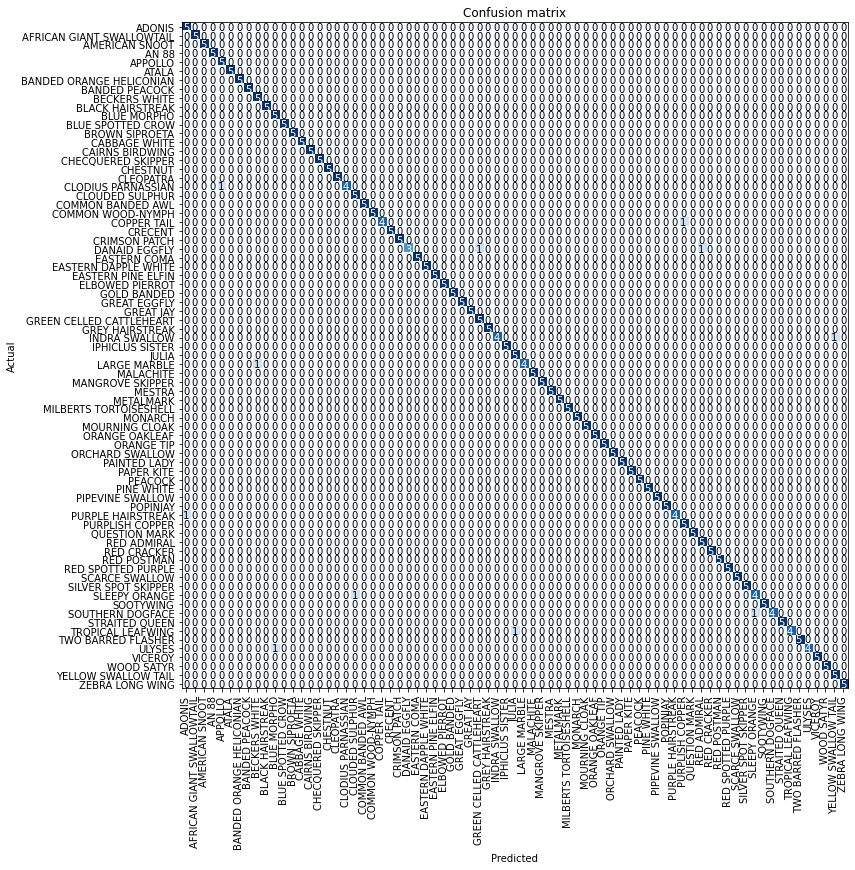

In [99]:
interp.plot_confusion_matrix(figsize = (12,12))

- Using the confusing matrix is not practical with big number of classes, rather insteade we use the most confused method to check the highest losses

In [76]:
interp.most_confused()

[('CLODIUS PARNASSIAN', 'APPOLLO', 1),
 ('COPPER TAIL', 'PURPLISH COPPER', 1),
 ('DANAID EGGFLY', 'GREEN CELLED CATTLEHEART', 1),
 ('DANAID EGGFLY', 'RED ADMIRAL', 1),
 ('INDRA SWALLOW', 'YELLOW SWALLOW TAIL', 1),
 ('LARGE MARBLE', 'BECKERS WHITE', 1),
 ('PURPLE HAIRSTREAK', 'ADONIS', 1),
 ('SLEEPY ORANGE', 'CLOUDED SULPHUR', 1),
 ('SOUTHERN DOGFACE', 'SLEEPY ORANGE', 1),
 ('TROPICAL LEAFWING', 'JULIA', 1),
 ('ULYSES', 'BLUE MORPHO', 1)]

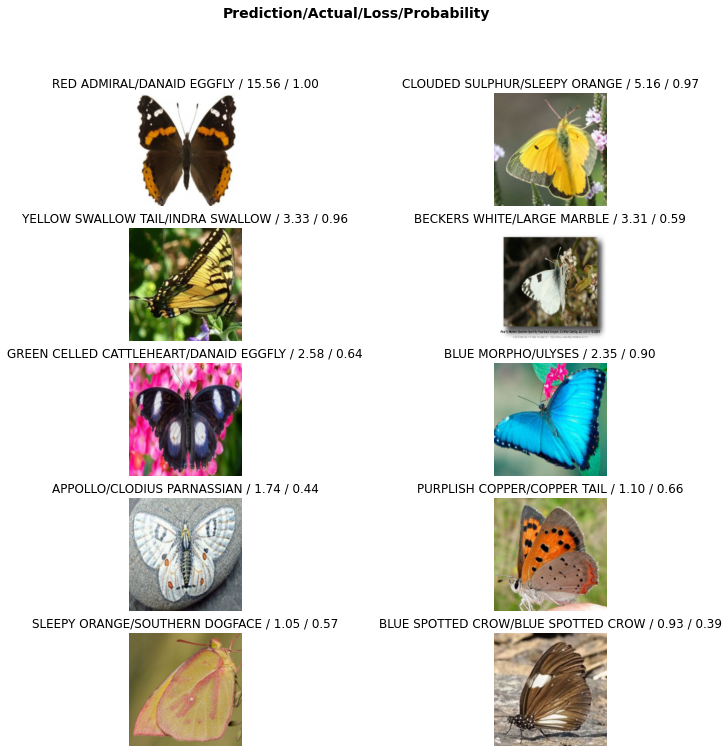

In [94]:

interp.plot_top_losses(10, nrows = 5, figsize=(12,12))

- The model has done a decent job specially considering the time of training and the number of epochs the missclassified images are for species that even expert could missclassify from time to time.

In [97]:
learn.export()